# Facebook metrics Dataset

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing Communities and Crime Dataset
missing_values = ["n/a", "na", "--","?"]
dataset = pd.read_csv('dataset_Facebook.csv', sep=';', na_values = missing_values)

In [2]:
# Check if dataset has null values
result = dataset.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column")
print(result.sum())

-> Contains Missing values                 True
-> Total Number of Missing values:         6
-> Number of Missing values by column
Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                        

In [3]:
# Filling Missing values with mean
dataset = dataset.fillna(dataset.mean())

In [4]:
data = pd.DataFrame(dataset)
# Check if dataset has null values
result = data.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column")
print(result.sum())

-> Contains Missing values                 False
-> Total Number of Missing values:         0
-> Number of Missing values by column
Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                       

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   500 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [6]:
X = data.iloc[:, :18].values
Y = data.iloc[:, 18].values

print(data)
print(X.shape)
print(Y.shape)

     Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
0              139441   Photo         2          12             4          3   
1              139441  Status         2          12             3         10   
2              139441   Photo         3          12             3          3   
3              139441   Photo         2          12             2         10   
4              139441   Photo         2          12             2          3   
..                ...     ...       ...         ...           ...        ...   
495             85093   Photo         3           1             7          2   
496             81370   Photo         2           1             5          8   
497             81370   Photo         1           1             5          2   
498             81370   Photo         3           1             4         11   
499             81370   Photo         2           1             4          4   

         Paid  Lifetime Post Total Reac

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,1] = labelencoder.fit_transform(X[:,1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give 93.7948904411872 accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression','MLPRegressior']
models = [SVR(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          AdaBoostRegressor(),
          GaussianProcessRegressor(kernel=kernel),
          LinearRegression(),
          MLPRegressor()]

param_distributions = {
    'SVR': {'C': [0.001, 0.1, 10, 20], 'gamma':[0.1, 1, 10]},
    'DecisionTreeRegressor': {'max_depth': [10, 20,30,40],'min_samples_leaf': [2, 4]},
    'RandomForestRegressor': {'max_depth': [1, 10, 20, 40],'n_estimators': [16, 32, 100],'bootstrap': [True, False],},
    'AdaBoostRegressor': {'n_estimators': [16, 32, 100],'learning_rate' : [0.2,0.4,1]},
    'GaussianProcessRegressor': {'normalize_y': ['True','False']},
    'LinearRegression': {},
    'MLPRegressior': {'hidden_layer_sizes': [(50,30),(100,)],'activation':['tanh', 'relu'], 'max_iter':[200,400]},
}

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    np.random.seed(0);
    gridcv = GridSearchCV(model, param_distributions[names[counter]], n_jobs=2, cv=3)
    gridcv.fit(X_train, Y_train)
    Y_pred  = gridcv.best_estimator_.predict(X_test)
    accuracy[counter] = round(r2_score(Y_test, Y_pred), 3)
    print("r2_score for " + names[counter] + ": "+str(accuracy[counter]))

C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


r2_score for SVR: 0.257


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


r2_score for DecisionTreeRegressor: 0.97


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


r2_score for RandomForestRegressor: 0.971


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


r2_score for AdaBoostRegressor: 0.95


r2_score for GaussianProcessRegressor: 0.005


r2_score for LinearRegression: 1.0


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


r2_score for MLPRegressior: 0.916


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Facebook metrics Dataset model accuracy')

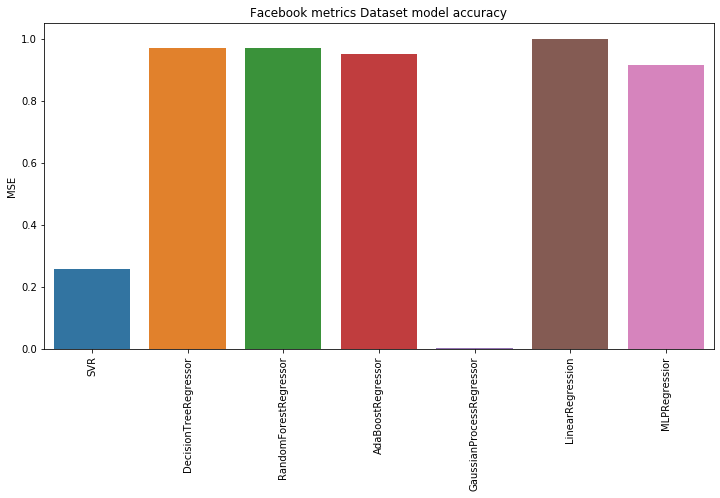

In [10]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('MSE')
plt.title('Facebook metrics Dataset model accuracy')